In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix
# read input data# read i 
Path =  pd.read_csv('Data_Balanced.csv', delimiter=',')

X  = Path.iloc[:,0:11]
y = Path.iloc[:,-1]
#pima.head()

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(activation='tanh', solver='sgd', hidden_layer_sizes=(10,7), random_state=42, max_iter=1000)
nn.fit(X_train, y_train)

C:\Users\Usuario\Anaconda3\envs\proyecto\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 7), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [5]:
nn_predictions = nn.predict(X_test)

cm0 = confusion_matrix(y_test, nn_predictions)
print ('True', y_test.values[0:23])
print ('Pred', nn_predictions[0:23])

True [0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0]
Pred [0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0]


In [6]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

cm1 = confusion_matrix(y_test, svm_predictions)
print ('True', y_test.values[0:23])
print ('Pred', svm_predictions[0:23])

True [0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0]
Pred [0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0]


In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)
knn_predictions = knn.predict(X_test) 

cm2 = confusion_matrix(y_test, knn_predictions)
print ('True', y_test.values[0:23])
print ('Pred', knn_predictions[0:23])

True [0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0]
Pred [0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0]


In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

cm3 = confusion_matrix(y_test, gnb_predictions)
print ('True', y_test.values[0:23])
print ('Pred', gnb_predictions[0:23])

True [0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0]
Pred [0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0]


In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1).fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

cm4 = confusion_matrix(y_test, lr_predictions)
print ('True', y_test.values[0:23])
print ('Pred', lr_predictions[0:23])

True [0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0]
Pred [0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0]


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X_train, y_train = make_classification(n_samples=150, n_features=11, n_informative=2, n_redundant=0,
                                      random_state=0, n_classes=2, shuffle=False)
rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

cm5 = confusion_matrix(y_test, rf_predictions)
print ('True', y_test.values[0:23])
print ('Pred', rf_predictions[0:23])
print(cm5)

C:\Users\Usuario\Anaconda3\envs\proyecto\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


True [0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0]
Pred [1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1]
[[6 5]
 [1 6]]


In [11]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(X_train, y_train)
arbol_predictions = arbol.predict(X_test)

cm6 = confusion_matrix(y_test, arbol_predictions)
print ('True', y_test.values[0:23])
print ('Pred', arbol_predictions[0:23])

True [0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0]
Pred [1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1]


In [12]:
print(confusion_matrix(y_test,nn_predictions))
print(confusion_matrix(y_test,svm_predictions))
print(confusion_matrix(y_test,knn_predictions))
print(confusion_matrix(y_test,gnb_predictions))
print(confusion_matrix(y_test,lr_predictions))
print(confusion_matrix(y_test,rf_predictions))
print(confusion_matrix(y_test,arbol_predictions))

[[11  0]
 [ 0  7]]
[[11  0]
 [ 0  7]]
[[9 2]
 [1 6]]
[[10  1]
 [ 1  6]]
[[11  0]
 [ 0  7]]
[[6 5]
 [1 6]]
[[6 5]
 [1 6]]


In [13]:
print(classification_report(y_test,nn_predictions))
print(classification_report(y_test,svm_predictions))
print(classification_report(y_test,knn_predictions))
print(classification_report(y_test,gnb_predictions))
print(classification_report(y_test,lr_predictions))
print(classification_report(y_test,rf_predictions))
print(classification_report(y_test,arbol_predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00         7

avg / total       1.00      1.00      1.00        18

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00         7

avg / total       1.00      1.00      1.00        18

             precision    recall  f1-score   support

          0       0.90      0.82      0.86        11
          1       0.75      0.86      0.80         7

avg / total       0.84      0.83      0.83        18

             precision    recall  f1-score   support

          0       0.91      0.91      0.91        11
          1       0.86      0.86      0.86         7

avg / total       0.89      0.89      0.89        18

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00 

In [14]:
data = X_test

print(nn.predict(data))
print(svm_model_linear.predict(data))
print(knn.predict(data))
print(gnb.predict(data))
print(lr.predict(data))
print(rf.predict(data))
print(arbol.predict(data))


[0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0]
[0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0]
[0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0]
[0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0]
[0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0]
[1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1]
[1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1]


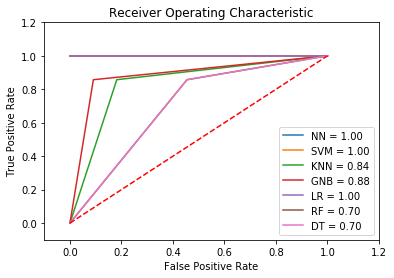

In [16]:
from sklearn.metrics import roc_curve, auc
y_test
#false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
nn_pred = nn.predict(data)
#print(y_test.values)
#print(nn_pred)

plt.title('Receiver Operating Characteristic')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values,nn_pred)
roc_auc1 = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, label='NN = %0.2f'% roc_auc1)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values,svm_model_linear.predict(data))
roc_auc2 = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, label='SVM = %0.2f'% roc_auc2)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values,knn.predict(data))
roc_auc3 = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, label='KNN = %0.2f'% roc_auc3)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values,gnb.predict(data))
roc_auc4 = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, label='GNB = %0.2f'% roc_auc4)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values,lr.predict(data))
roc_auc5 = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, label='LR = %0.2f'% roc_auc5)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values,rf.predict(data))
roc_auc6 = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, label='RF = %0.2f'% roc_auc6)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values,arbol.predict(data))
roc_auc7 = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, label='DT = %0.2f'% roc_auc7)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()